Simulating Epidemic Dynamics Using Network Diffusion Models

In [ ]:
# Check out the following websites for more information about the libriaries used here
# https://networkx.org/
# https://ndlib.readthedocs.io/en/latest/index.html

In [ ]:
# install ndlib
!pip install ndlib

In [2]:
#import ndlib
import numpy as np
import networkx as nx
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc
import matplotlib.pyplot as plt
%matplotlib inline
import operator

nx.__version__

'3.1'

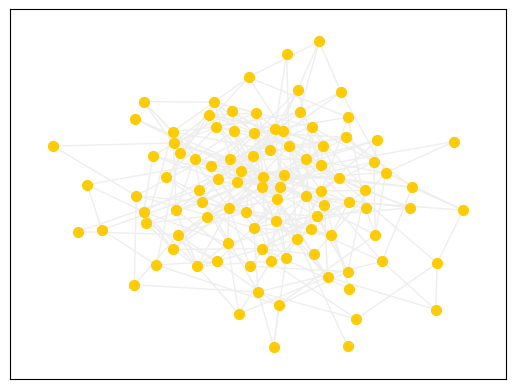

In [3]:
# create a random graph with 100 nodes and 300 edges
G = nx.dense_gnm_random_graph(100, 300, seed=42)

# Position nodes using Fruchterman-Reingold force-directed algorithm
pos = nx.spring_layout(G)

# draw graph
nx.draw_networkx(G, pos=pos, with_labels=False, node_color='#FDCC07',
                 edge_color='#eeeeee', node_size=50)

In [4]:

# SIS assumes that if, during a generic iteration, a susceptible node comes into contact with an infected one,
# it becomes infected with probability beta, than it can be switch again to susceptible with probability lambda
#(the only transition allowed are S→I→S).

model = ep.SISModel(G)

cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.5)
cfg.add_model_parameter('lambda', 0.005)
cfg.add_model_parameter("fraction_infected", 0.1)
#--------------------------------
# you can also set the seed nodes instead of random assignment
#seed_nodes = list(G.nodes)[:5]
#print("Selected seed nodes:", seed_nodes)
#cfg.add_model_initial_configuration("Infected", seed_nodes)
#--------------------------------
model.set_initial_status(cfg)

iterations = model.iteration_bunch(10)

In [5]:
iterations[1]

{'iteration': 1,
 'status': {0: 1,
  10: 1,
  12: 1,
  14: 1,
  16: 1,
  20: 1,
  22: 1,
  28: 1,
  29: 1,
  30: 1,
  32: 1,
  34: 1,
  36: 1,
  46: 1,
  47: 1,
  49: 1,
  52: 1,
  53: 1,
  55: 1,
  59: 1,
  65: 1,
  71: 1,
  81: 1,
  91: 1,
  95: 1,
  97: 1,
  99: 1},
 'node_count': {0: 63, 1: 37},
 'status_delta': {0: -27, 1: 27}}

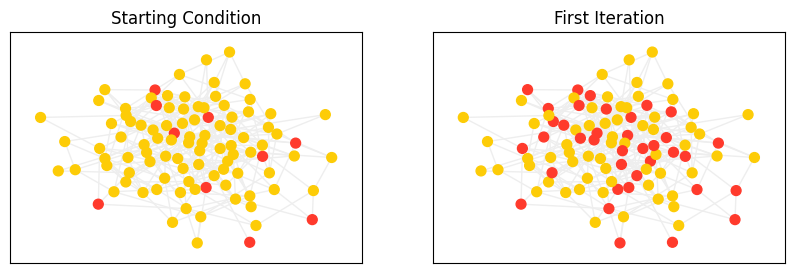

In [6]:
color_list = ['#FDCC07', '#FF3A2C']
fig, axes = plt.subplots(1, 2, figsize=[10,3])
node_list_before = [color_list[v] for _, v in iterations[0]['status'].items()]
nx.draw_networkx(G, pos=pos, with_labels=False, node_color=node_list_before,
                 edge_color='#eeeeee', node_size=50, ax=axes[0])
axes[0].set_title("Starting Condition")

for k, v in iterations[1]['status'].items():
    node_list_before[k] = color_list[v]
nx.draw_networkx(G, pos=pos, with_labels=False, node_color=node_list_before,
                 edge_color='#eeeeee', node_size=50, ax=axes[1])
axes[1].set_title("First Iteration");

In [25]:
model = ep.SIRModel(G)

cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.1)
cfg.add_model_parameter('gamma', 0.05) # the probibility of removed if infected
cfg.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(cfg)

iterations = model.iteration_bunch(10)

In [26]:
iterations[1]

{'iteration': 1,
 'status': {40: 1, 71: 1},
 'node_count': {0: 93, 1: 7, 2: 0},
 'status_delta': {0: -2, 1: 2, 2: 0}}

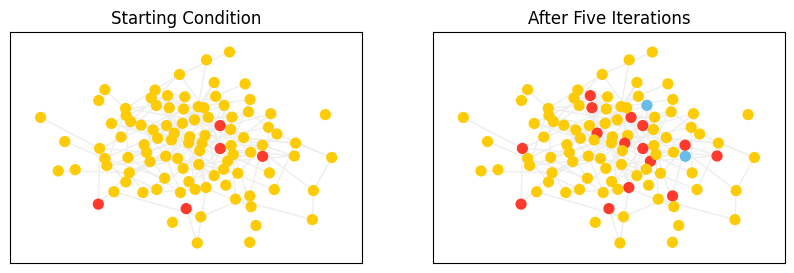

In [29]:
color_list = ['#FDCC07', '#FF3A2C', '#66BDE9']
fig, axes = plt.subplots(1, 2, figsize=[10,3])
node_list_before = [color_list[v] for _, v in iterations[0]['status'].items()]
nx.draw_networkx(G, pos=pos, with_labels=False, node_color=node_list_before,
                 edge_color='#eeeeee', node_size=50, ax=axes[0])
axes[0].set_title("Starting Condition")

for i in range(1, 6):
    for k, v in iterations[i]['status'].items():
        node_list_before[k] = color_list[v]
nx.draw_networkx(G, pos=pos, with_labels=False, node_color=node_list_before,
                 edge_color='#eeeeee', node_size=50, ax=axes[1])
axes[1].set_title("After Five Iterations");

# SIS

In [10]:
def simulate_SIS(G, importance_measure=None, iterate=100, n=1, beta=0.1, _lambda=0.05):

    if importance_measure:
        # select seed nodes
        sorted_node = sorted(importance_measure(G).items(), key=operator.itemgetter(1))[::-1]
        highest_nodes = [n for n, _ in sorted_node[:n]]

    # Model selection
    model = ep.SISModel(G, seed = 42)


    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', beta)
    cfg.add_model_parameter('lambda', _lambda)

    if importance_measure:
        infected_nodes = highest_nodes
        cfg.add_model_initial_configuration("Infected", infected_nodes)

    fraction =  float(n)/len(G.nodes)
    cfg.add_model_parameter("fraction_infected", fraction)

    model.set_initial_status(cfg)


    # Simulation execution
    iterations = model.iteration_bunch(iterate)
    return [it['node_count'][1] for it in iterations]

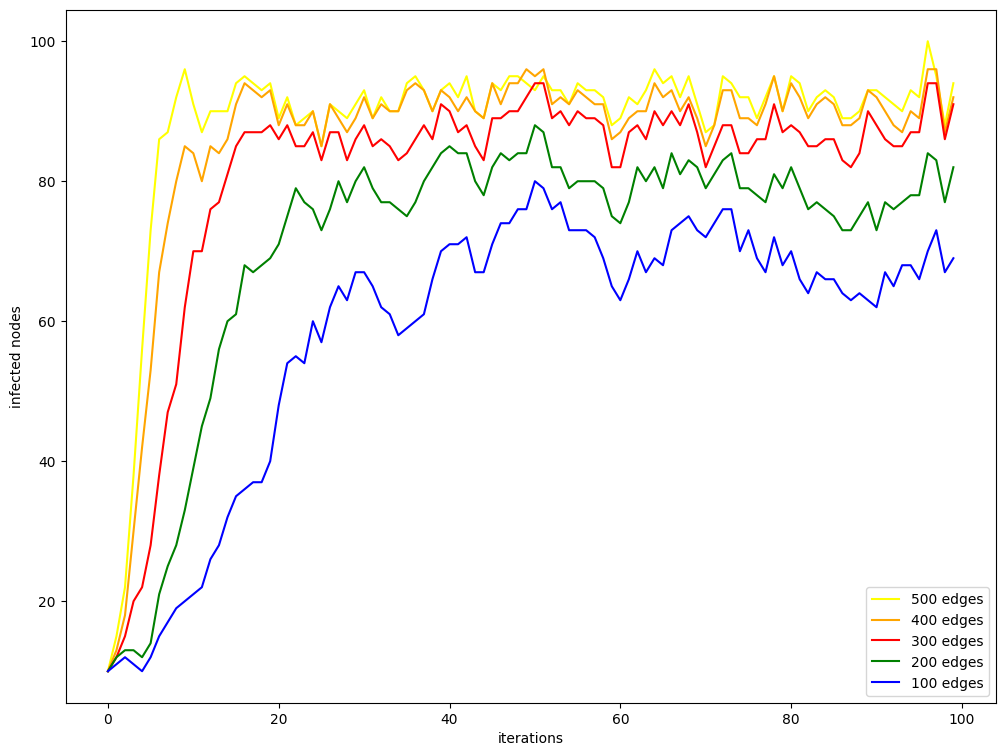

In [23]:
# looking at how the number of edges impacts the number of infected nodes

N=10      # initial number of infected nodes
I=100     # number of iterations
b = 0.1   # probability of infection if S node comes into contact with I node
l = 0.05  # probability of node going back to susceptible

G = nx.dense_gnm_random_graph(100, 500, seed=42)
edge_count_5 = simulate_SIS(G, importance_measure=None, iterate=I, n=N, beta=b, _lambda=l )


G = nx.dense_gnm_random_graph(100, 400, seed=42)
edge_count_4 = simulate_SIS(G, importance_measure=None, iterate=I, n=N, beta=b, _lambda=l)


G = nx.dense_gnm_random_graph(100, 300, seed=42)
edge_count_3 = simulate_SIS(G, importance_measure=None, iterate=I, n=N, beta=b, _lambda=l)


G = nx.dense_gnm_random_graph(100, 200, seed=42)
edge_count_2 = simulate_SIS(G, importance_measure=None, iterate=I, n=N, beta=b, _lambda=l)


G = nx.dense_gnm_random_graph(100, 150, seed=42)
edge_count_1 = simulate_SIS(G, importance_measure=None, iterate=I, n=N, beta=b, _lambda=l)

#------------------------------------------------------------
x= np.arange(0,I,1, dtype=int)


fig, axs = plt.subplots()
fig.set_size_inches(12, 9)

axs.plot(x, edge_count_5, color='yellow', label='500 edges')
axs.plot(x, edge_count_4, color='orange', label='400 edges')
axs.plot(x, edge_count_3, color='red', label='300 edges')
axs.plot(x, edge_count_2, color='green', label='200 edges')
axs.plot(x, edge_count_1, color='blue', label='100 edges')

axs.set_title('')
axs.set_xlabel('iterations')
axs.set_ylabel('infected nodes')
axs.legend()

# SIR

In [12]:
def simulate_SIR(G, importance_measure=None, iterate=100, n=1, beta=0.1, gamma=0.05):
    if importance_measure:
        # select seed nodes
        sorted_node = sorted(importance_measure(G).items(), key=operator.itemgetter(1))[::-1]
        highest_nodes = [n for n, _ in sorted_node[:n]]

    # Model selection
    model = ep.SIRModel(G, seed = 42)

    # Model Configuration
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', beta)
    cfg.add_model_parameter('gamma', gamma)

    if importance_measure:
        infected_nodes = highest_nodes
        cfg.add_model_initial_configuration("Infected", infected_nodes)

    fraction =  float(n)/len(G.nodes)
    cfg.add_model_parameter("fraction_infected", fraction)

    model.set_initial_status(cfg)

    # Simulation execution
    iterations = model.iteration_bunch(iterate)

    total_infected_nodes = [0] * iterate

    #computing total number of infected nodes here
    i_nodes = []
    for i in range(iterate):
        tups = iterations[i]['status'].items()
        for k,  v in tups:
            if v == 1:
                i_nodes.append(k)
        total_infected_nodes[i] = len(set(i_nodes))
    #print(len(i_nodes))
    #print(set(i_nodes))

    return [it['node_count'][1] for it in iterations], total_infected_nodes

In [13]:
G = nx.dense_gnm_random_graph(100, 300, seed=42)

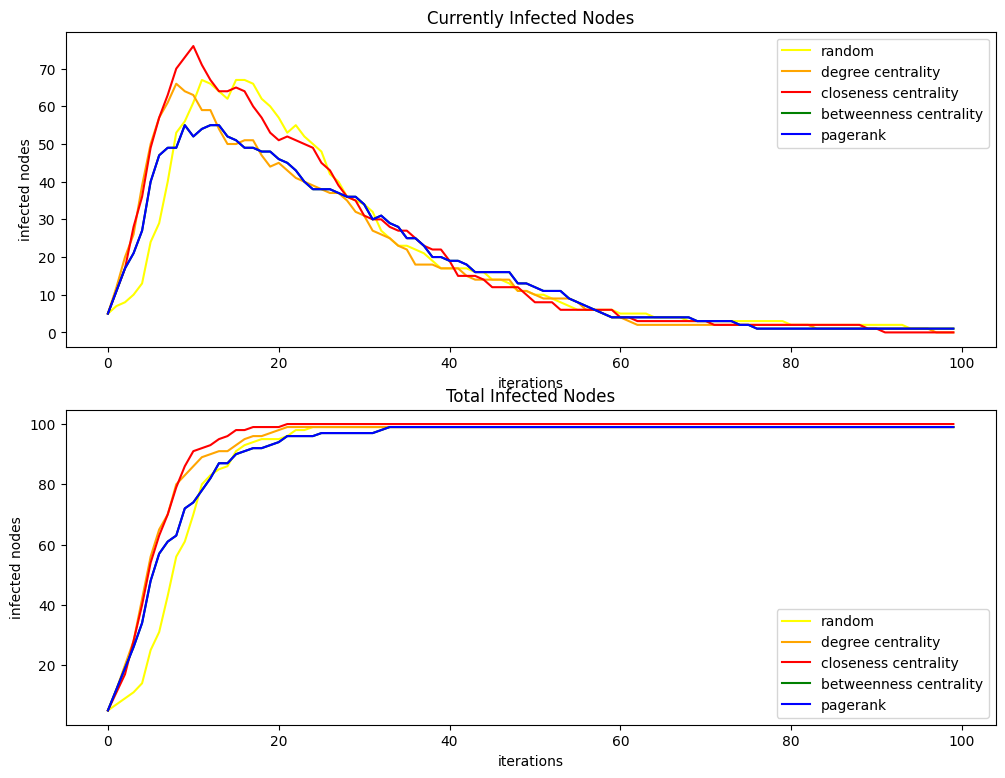

In [20]:
# looking at how the seed node selection impacts the number of infected nodes

N=5
I=100
b = 0.1 # probability of infection if S node comes into contact with I node
g = 0.05 # probibility of R if I

node_count_random = None     # number of currently infected nodes at each iteration, init with randomly selected nodes.
node_count_deg = None        # number of currently infected nodes at each iteration, init with nodes of highest degree.
node_count_closeness= None   # number of currently infected nodes at each iteration, init with nodes of highest closeness centrality.
node_count_betweenness = None  # number of currently infected nodes at each iteration, init with nodes of highest betweenness centrality.
node_count_pagerank = None   # number of currently infected nodes at each iteration, init with nodes of highest pagerank.

total_random = None # number of nodes that have been infected up to each iterartion, init with randomly selected nodes.
total_deg = None # number of nodes that have been infected up to each iterartion, init with nodes of highest degree.
total_closeness = None # number of nodes that have been infected up to each iterartion, init with nodes of highest closeness centrality.
total_betweenness = None # number of nodes that have been infected up to each iterartion, init with nodes of highest betweenness centrality.
total_pagerank = None # number of nodes that have been infected up to each iterartion, init with nodes of highest pagerank.


nc_r = simulate_SIR(G, importance_measure=None, iterate=I, n=N, beta=b, gamma=g)
node_count_random = nc_r[0]
total_random = nc_r[1]

nc_d = simulate_SIR(G, importance_measure=nx.degree_centrality, iterate=I, n=N, beta=b, gamma=g)
node_count_deg = nc_d[0]
total_deg = nc_d[1]

nc_c = simulate_SIR(G, importance_measure=nx.closeness_centrality, iterate=I, n=N, beta=b, gamma=g)
node_count_closeness = nc_c[0]
total_closeness = nc_c[1]

nc_b = simulate_SIR(G, importance_measure=nx.betweenness_centrality, iterate=I, n=N, beta=b, gamma=g)
node_count_betweenness = nc_b[0]
total_betweenness = nc_b[1]

nc_p = simulate_SIR(G, importance_measure=nx.pagerank, iterate=I, n=N, beta=b, gamma=g)
node_count_pagerank = nc_p[0]
total_pagerank = nc_p[1]

#------------------------------------------------------------
x= np.arange(0,I,1, dtype=int)


fig, (axs1, axs2) = plt.subplots(2,1)
fig.set_size_inches(12, 9)

axs1.plot(x, node_count_random, color='yellow', label='random')
axs1.plot(x, node_count_deg, color='orange', label='degree centrality')
axs1.plot(x, node_count_closeness, color='red', label='closeness centrality')
axs1.plot(x, node_count_betweenness, color='green', label='betweenness centrality')
axs1.plot(x, node_count_pagerank, color='blue', label='pagerank')

axs1.set_title('Currently Infected Nodes')
axs1.set_xlabel('iterations')
axs1.set_ylabel('infected nodes')
axs1.legend()

axs2.plot(x, total_random, color='yellow', label='random')
axs2.plot(x, total_deg, color='orange', label='degree centrality')
axs2.plot(x, total_closeness, color='red', label='closeness centrality')
axs2.plot(x, total_betweenness, color='green', label='betweenness centrality')
axs2.plot(x, total_pagerank, color='blue', label='pagerank')

axs2.set_title('Total Infected Nodes')
axs2.set_xlabel('iterations')
axs2.set_ylabel('infected nodes')
axs2.legend()

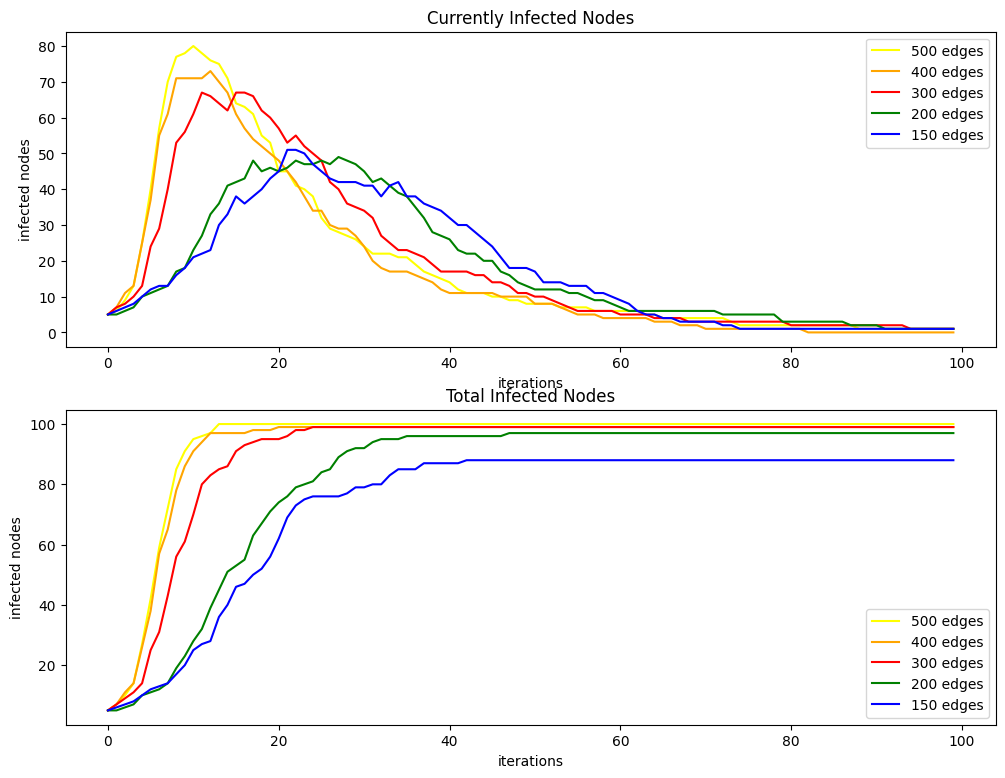

In [28]:
# looking at how the number of edges impacts the number of infected nodes

N=5
I=100
b = 0.1
g = 0.05

node_count_random = None     # number of currently infected nodes at each iteration, init with randomly selected nodes.
node_count_deg = None        # number of currently infected nodes at each iteration, init with nodes of highest degree.
node_count_closeness= None   # number of currently infected nodes at each iteration, init with nodes of highest closeness centrality.
node_count_betweenness = None  # number of currently infected nodes at each iteration, init with nodes of highest betweenness centrality.
node_count_pagerank = None   # number of currently infected nodes at each iteration, init with nodes of highest pagerank.

total_random = None # number of nodes that have been infected up to each iterartion, init with randomly selected nodes.
total_deg = None # number of nodes that have been infected up to each iterartion, init with nodes of highest degree.
total_closeness = None # number of nodes that have been infected up to each iterartion, init with nodes of highest closeness centrality.
total_betweenness = None # number of nodes that have been infected up to each iterartion, init with nodes of highest betweenness centrality.
total_pagerank = None # number of nodes that have been infected up to each iterartion, init with nodes of highest pagerank.

G = nx.dense_gnm_random_graph(100, 500, seed=42)
nc_r = simulate_SIR(G, importance_measure=None, iterate=I, n=N, beta=b, gamma=g)
node_count_random = nc_r[0]
total_random = nc_r[1]

G = nx.dense_gnm_random_graph(100, 400, seed=42)
nc_d = simulate_SIR(G, importance_measure=None, iterate=I, n=N, beta=b, gamma=g)
node_count_deg = nc_d[0]
total_deg = nc_d[1]

G = nx.dense_gnm_random_graph(100, 300, seed=42)
nc_c = simulate_SIR(G, importance_measure=None, iterate=I, n=N, beta=b, gamma=g)
node_count_closeness = nc_c[0]
total_closeness = nc_c[1]

G = nx.dense_gnm_random_graph(100, 200, seed=42)
nc_b = simulate_SIR(G, importance_measure=None, iterate=I, n=N, beta=b, gamma=g)
node_count_betweenness = nc_b[0]
total_betweenness = nc_b[1]

G = nx.dense_gnm_random_graph(100, 150, seed=42)
nc_p = simulate_SIR(G, importance_measure=None, iterate=I, n=N, beta=b, gamma=g)
node_count_pagerank = nc_p[0]
total_pagerank = nc_p[1]

#------------------------------------------------------------
x= np.arange(0,I,1, dtype=int)


fig, (axs1, axs2) = plt.subplots(2,1)
fig.set_size_inches(12, 9)

axs1.plot(x, node_count_random, color='yellow', label='500 edges')
axs1.plot(x, node_count_deg, color='orange', label='400 edges')
axs1.plot(x, node_count_closeness, color='red', label='300 edges')
axs1.plot(x, node_count_betweenness, color='green', label='200 edges')
axs1.plot(x, node_count_pagerank, color='blue', label='150 edges')

axs1.set_title('Currently Infected Nodes')
axs1.set_xlabel('iterations')
axs1.set_ylabel('infected nodes')
axs1.legend()

axs2.plot(x, total_random, color='yellow', label='500 edges')
axs2.plot(x, total_deg, color='orange', label='400 edges')
axs2.plot(x, total_closeness, color='red', label='300 edges')
axs2.plot(x, total_betweenness, color='green', label='200 edges')
axs2.plot(x, total_pagerank, color='blue', label='150 edges')

axs2.set_title('Total Infected Nodes')
axs2.set_xlabel('iterations')
axs2.set_ylabel('infected nodes')
axs2.legend()

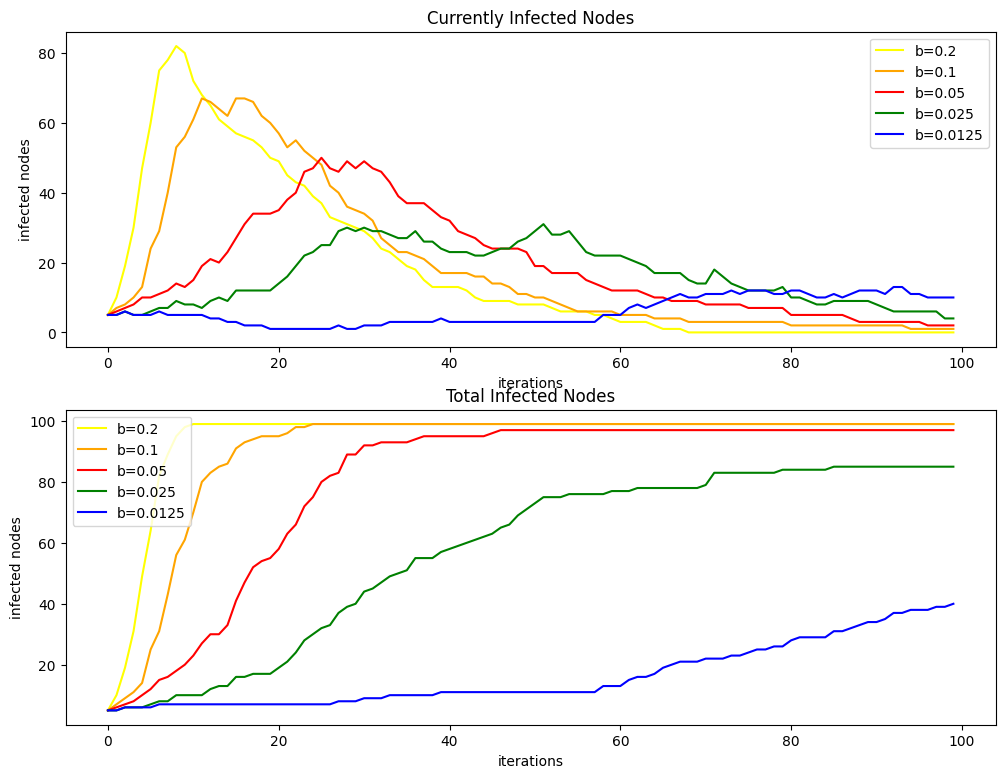

In [16]:
# looking at how beta impacts the number of infected nodes

N=5
I=100
#b = 0.1 #this will change for each
g = 0.05

node_count_random = None     # number of currently infected nodes at each iteration, init with randomly selected nodes.
node_count_deg = None        # number of currently infected nodes at each iteration, init with nodes of highest degree.
node_count_closeness= None   # number of currently infected nodes at each iteration, init with nodes of highest closeness centrality.
node_count_betweenness = None  # number of currently infected nodes at each iteration, init with nodes of highest betweenness centrality.
node_count_pagerank = None   # number of currently infected nodes at each iteration, init with nodes of highest pagerank.

total_random = None # number of nodes that have been infected up to each iterartion, init with randomly selected nodes.
total_deg = None # number of nodes that have been infected up to each iterartion, init with nodes of highest degree.
total_closeness = None # number of nodes that have been infected up to each iterartion, init with nodes of highest closeness centrality.
total_betweenness = None # number of nodes that have been infected up to each iterartion, init with nodes of highest betweenness centrality.
total_pagerank = None # number of nodes that have been infected up to each iterartion, init with nodes of highest pagerank.

G = nx.dense_gnm_random_graph(100, 300, seed=42)

b=0.2
nc_r = simulate_SIR(G, importance_measure=None, iterate=I, n=N, beta=b, gamma=g)
node_count_random = nc_r[0]
total_random = nc_r[1]

b=0.1
nc_d = simulate_SIR(G, importance_measure=None, iterate=I, n=N, beta=b, gamma=g)
node_count_deg = nc_d[0]
total_deg = nc_d[1]

b=0.05
nc_c = simulate_SIR(G, importance_measure=None, iterate=I, n=N, beta=b, gamma=g)
node_count_closeness = nc_c[0]
total_closeness = nc_c[1]

b=0.025
nc_b = simulate_SIR(G, importance_measure=None, iterate=I, n=N, beta=b, gamma=g)
node_count_betweenness = nc_b[0]
total_betweenness = nc_b[1]

b=0.0125
nc_p = simulate_SIR(G, importance_measure=None, iterate=I, n=N, beta=b, gamma=g)
node_count_pagerank = nc_p[0]
total_pagerank = nc_p[1]

#------------------------------------------------------------
x= np.arange(0,I,1, dtype=int)


fig, (axs1, axs2) = plt.subplots(2,1)
fig.set_size_inches(12, 9)

axs1.plot(x, node_count_random, color='yellow', label='b=0.2')
axs1.plot(x, node_count_deg, color='orange', label='b=0.1')
axs1.plot(x, node_count_closeness, color='red', label='b=0.05')
axs1.plot(x, node_count_betweenness, color='green', label='b=0.025')
axs1.plot(x, node_count_pagerank, color='blue', label='b=0.0125')

axs1.set_title('Currently Infected Nodes')
axs1.set_xlabel('iterations')
axs1.set_ylabel('infected nodes')
axs1.legend()

axs2.plot(x, total_random, color='yellow', label='b=0.2')
axs2.plot(x, total_deg, color='orange', label='b=0.1')
axs2.plot(x, total_closeness, color='red', label='b=0.05')
axs2.plot(x, total_betweenness, color='green', label='b=0.025')
axs2.plot(x, total_pagerank, color='blue', label='b=0.0125')

axs2.set_title('Total Infected Nodes')
axs2.set_xlabel('iterations')
axs2.set_ylabel('infected nodes')
axs2.legend()

I have always been interested in diseases caused by bacteria and viruses. Maybe because I find it fascinating that something so small can inflict so much damage on larger organisms populations. Or maybe because I’m worried about an epidemic decimating the human population and throwing civilization into chaos. The ongoing COVID 19 pandemic has piqued my interest in how human behavior can influence epidemic dynamics.
I decided to explore the impact of contact networks and intervention strategies on the dynamics of a simulated epidemic using the Python libraries NetworkX and NDlib. NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. NDlib is a Python package for simulating diffusion processes on complex networks.
Diffusion models are mathematical models used to understand the spread and propagation of epidemics within a population. These models help inform public health responses, guide decision-making, and contribute to effective control and prevention strategies during epidemics. Diffusion models are particularly useful for studying epidemics that exhibit spatial or temporal patterns and can provide insights into the dynamics of disease transmission.
Diffusion models can be used to evaluate the effectiveness of different intervention strategies in controlling the spread of epidemics. By simulating the impact of interventions such as vaccination campaigns, social distancing measures, or masking protocols, these models can help assess the potential outcomes of various control measures. This information guides decision-making by policymakers and public health officials in determining the most effective interventions to mitigate the epidemic.
Diffusion models often incorporate contact networks or social networks to analyze the dynamics of disease transmission. These models represent the social connections between individuals and the patterns of interactions that facilitate the spread of the infection. By considering the structure of the contact network, diffusion models can simulate the progression of the epidemic through the network and identify key individuals or groups that play a significant role in disease propagation. This knowledge is useful for implementing targeted interventions, such as contact tracing or isolating individuals with a high number of connections.
First let’s set up a baseline scenario. There are 100 nodes (aka people). There are 300 edges (aka connections or relationships) between these nodes which are assigned randomly. We will assume the organism responsible for the epidemic infects nodes with a probability of 0.1 if they are exposed. We will also assume that once infected a person/node can die or recover from the infection and not be infected again for the duration of the simulation. The probability of an infected node being removed will be 0.05. Effectively, a node is only allowed to change its status from Susceptible (S) to Infected (I), then to Removed (R). This is known as an SIR model. Let’s run this model for 300 iterations (we could think of an iteration as a unit of time like a day or week). We will start with 5 infected nodes assigned randomly.


Here we can see that the maximum number of infected peaks between 60-70 and every ends up infected by iteration number 30.
Now let’s see what happens if we increase or decrease the number of edges between nodes. Decreasing the number of edges could represent the impact of social distancing policies. Increasing the number of edges could represent everyone partying because civilization as we know it is about to end.

Now let’s see what happens if we increase the beta parameter. Remember that beta represents the probability a susceptible node will become infected if it encounters an infected node. This could represent everyone wearing masks. If everyone wore masks then beta would go up, assuming our simulated disease spread in the same was as COVID 19.

Does it matter who starts out infected? Remember that so far, the starting infected nodes were assigned randomly. What if the starting infected nodes had more edge connections than most of the other nodes (high degree centrality)? What if the starting infected nodes were closer to more nodes in the network (high closeness centrality?
